In [97]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import planar_utils
import testCases
import testCases_v2
%matplotlib inline

In [3]:
X , Y = planar_utils.load_planar_dataset()

In [7]:
print(X.shape , Y.shape)

(2, 400) (1, 400)


In [12]:
print(X[0,:].shape , Y[0,:200].shape)

(400,) (200,)


<ipython-input-33-2f900f66aaa9>:2: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([0 , 1] , ["r", "g" ])


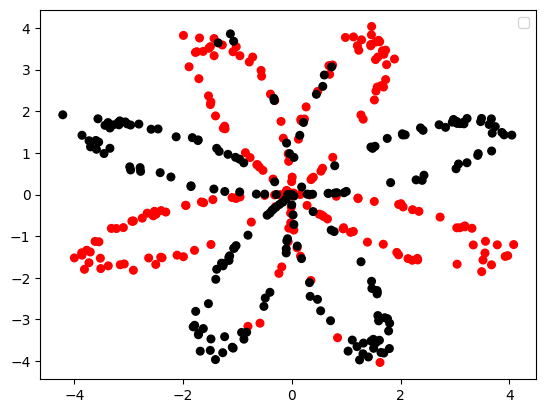

In [33]:
plt.scatter(X[0,:],X[1,:],c=Y,s=30,cmap=plt.cm.flag)

In [36]:
regressor = sklearn.linear_model.LogisticRegression()
regressor.fit(X.T,Y.T)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(
...     classifier, X, resposnresponse_method="predict",
...     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
...     alpha=0.5,
... )

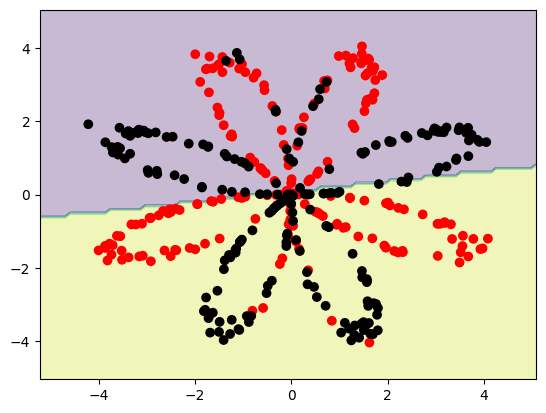

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(regressor , X.T ,response_method = "predict", alpha=0.3 )
disp.ax_.scatter(X[0,:],X[1,:],c=Y,cmap = plt.cm.flag)

In [49]:
regressor.score(X.T,Y.T)

0.47

In [57]:
def layer_sizes(X,Y):
  n0 = X.shape[0]
  n1 = 4
  n2 = Y.shape[0]
  return (n0,n1,n2)

In [58]:
X_assess, Y_assess = testCases.layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [67]:
def initialize_parameters(n0,n1,n2):

  W1 = np.random.randn(n1,n0) *0.01
  W2 = np.random.randn(n2,n1) *0.01
  b1 = np.zeros((n1,1))
  b2 = np.zeros((n2,1))
  parametrs = {
      "W1":W1,
      "W2":W2,
      "b1":b1,
      "b2":b2
  }
  return parametrs

In [68]:
np.random.seed(2)
n_x, n_h, n_y = testCases.initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [101]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [102]:
def forward_propagation(X,parameters):
  Z1 = np.dot(parameters["W1"],X) + parameters["b1"]
  A1 = np.tanh(Z1)
  assert(A1.shape == (parameters["b1"].shape[0],X.shape[1]))
  Z2 = np.dot(parameters['W2'],A1)+parameters["b2"]
  A2 = sigmoid(Z2)
  assert(A2.shape == (1, X.shape[1]))
  cache = {
      "Z1" :Z1,
      "A1" :A1,
      "Z2" :Z2,
      "A2" :A2
  }
  return A2, cache

In [103]:
X_assess, parameters = testCases_v2.forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [134]:
def compute_cost(y_hat,Y):
  temp = -(Y*np.log(y_hat))
  temp -= (1-Y)*np.log(1-y_hat)
  return np.sum(temp)*(1/Y.shape[1])

In [135]:
A2, Y_assess, parameters = testCases_v2.compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646
